In [1]:
import pandas as pd
import statistics

In [2]:
df = pd.read_csv("train copy.csv")

In [46]:
lang = df["Lang"].unique()
res = {}
for l in lang:
    res[l] = {}

for i in df["Lang"].unique():
    res[i]["nb"] = df[df["Lang"] == i]["Lang"].count()
    res[i]["moy length"] = df[df["Lang"] == i]["Text"].str.len().mean()
    res[i]["max length"] = df[df["Lang"] == i]["Text"].str.len().max()
    res[i]["min length"] = df[df["Lang"] == i]["Text"].str.len().min()
    res[i]["esperance length"] = df[df["Lang"] == i]["Text"].str.len().std()
    res[i]["moy nb mot"] = df[df["Lang"] == i]["Text"].str.split().str.len().mean()
    res[i]["max nb mot"] = df[df["Lang"] == i]["Text"].str.split().str.len().max()
    res[i]["min nb mot"] = df[df["Lang"] == i]["Text"].str.split().str.len().min()
    res[i]["esperance nb mot"] = df[df["Lang"] == i]["Text"].str.split().str.len().std()
    res[i]["moy nb phrase"] = df[df["Lang"] == i]["Text"].str.split(".").str.len().mean()
    res[i]["max nb phrase"] = df[df["Lang"] == i]["Text"].str.split(".").str.len().max()
    res[i]["min nb phrase"] = df[df["Lang"] == i]["Text"].str.split(".").str.len().min()
    res[i]["esperance nb phrase"] = df[df["Lang"] == i]["Text"].str.split(".").str.len().std()
    

    print(
        "lang =", i, ", nb=", round(df[df["Lang"] == i]["Lang"].count(), 3), 
        ", moy length=", round(df[df["Lang"] == i]["Text"].str.len().mean(), 3), 
        ", max length=", round(df[df["Lang"] == i]["Text"].str.len().max(), 3),
        ", min length=", round(df[df["Lang"] == i]["Text"].str.len().min(), 3),
        ", esperance length=", round(df[df["Lang"] == i]["Text"].str.len().std(), 3),
        ", moy nb mot :", round(df[df["Lang"] == i]["Text"].str.split().str.len().mean(), 3),
        ", max nb mot:", round(df[df["Lang"] == i]["Text"].str.split().str.len().max(), 3),
        ", min nb mot:", round(df[df["Lang"] == i]["Text"].str.split().str.len().min(), 3),
        ", esperance nb mot:", round(df[df["Lang"] == i]["Text"].str.split().str.len().std(), 3),
        ", moy nb phrase:", round(df[df["Lang"] == i]["Text"].str.split(".").str.len().mean(), 3),
        ", max nb phrase:", round(df[df["Lang"] == i]["Text"].str.split(".").str.len().max(), 3),
        ", min nb phrase:", round(df[df["Lang"] == i]["Text"].str.split(".").str.len().min(), 3),
        ", esperance nb phrase:", round(df[df["Lang"] == i]["Text"].str.split(".").str.len().std(), 3),
    )


lang = (GER) , nb= 900 , moy length= 1953.183 , max length= 4141 , min length= 333 , esperance length= 367.825 , moy nb mot : 376.533 , max nb mot: 806 , min nb mot: 63 , esperance nb mot: 69.772 , moy nb phrase: 18.434 , max nb phrase: 40 , min nb phrase: 5 , esperance nb phrase: 4.336
lang = (TUR) , nb= 900 , moy length= 1842.067 , max length= 4154 , min length= 68 , esperance length= 437.446 , moy nb mot : 352.671 , max nb mot: 776 , min nb mot: 15 , esperance nb mot: 83.303 , moy nb phrase: 18.611 , max nb phrase: 44 , min nb phrase: 1 , esperance nb phrase: 5.567
lang = (CHI) , nb= 900 , moy length= 1852.431 , max length= 4620 , min length= 91 , esperance length= 432.747 , moy nb mot : 361.812 , max nb mot: 876 , min nb mot: 16 , esperance nb mot: 82.095 , moy nb phrase: 18.448 , max nb phrase: 38 , min nb phrase: 2 , esperance nb phrase: 5.329
lang = (TEL) , nb= 900 , moy length= 1900.249 , max length= 4073 , min length= 747 , esperance length= 386.31 , moy nb mot : 359.039 , max

In [50]:
import matplotlib.pyplot as plt

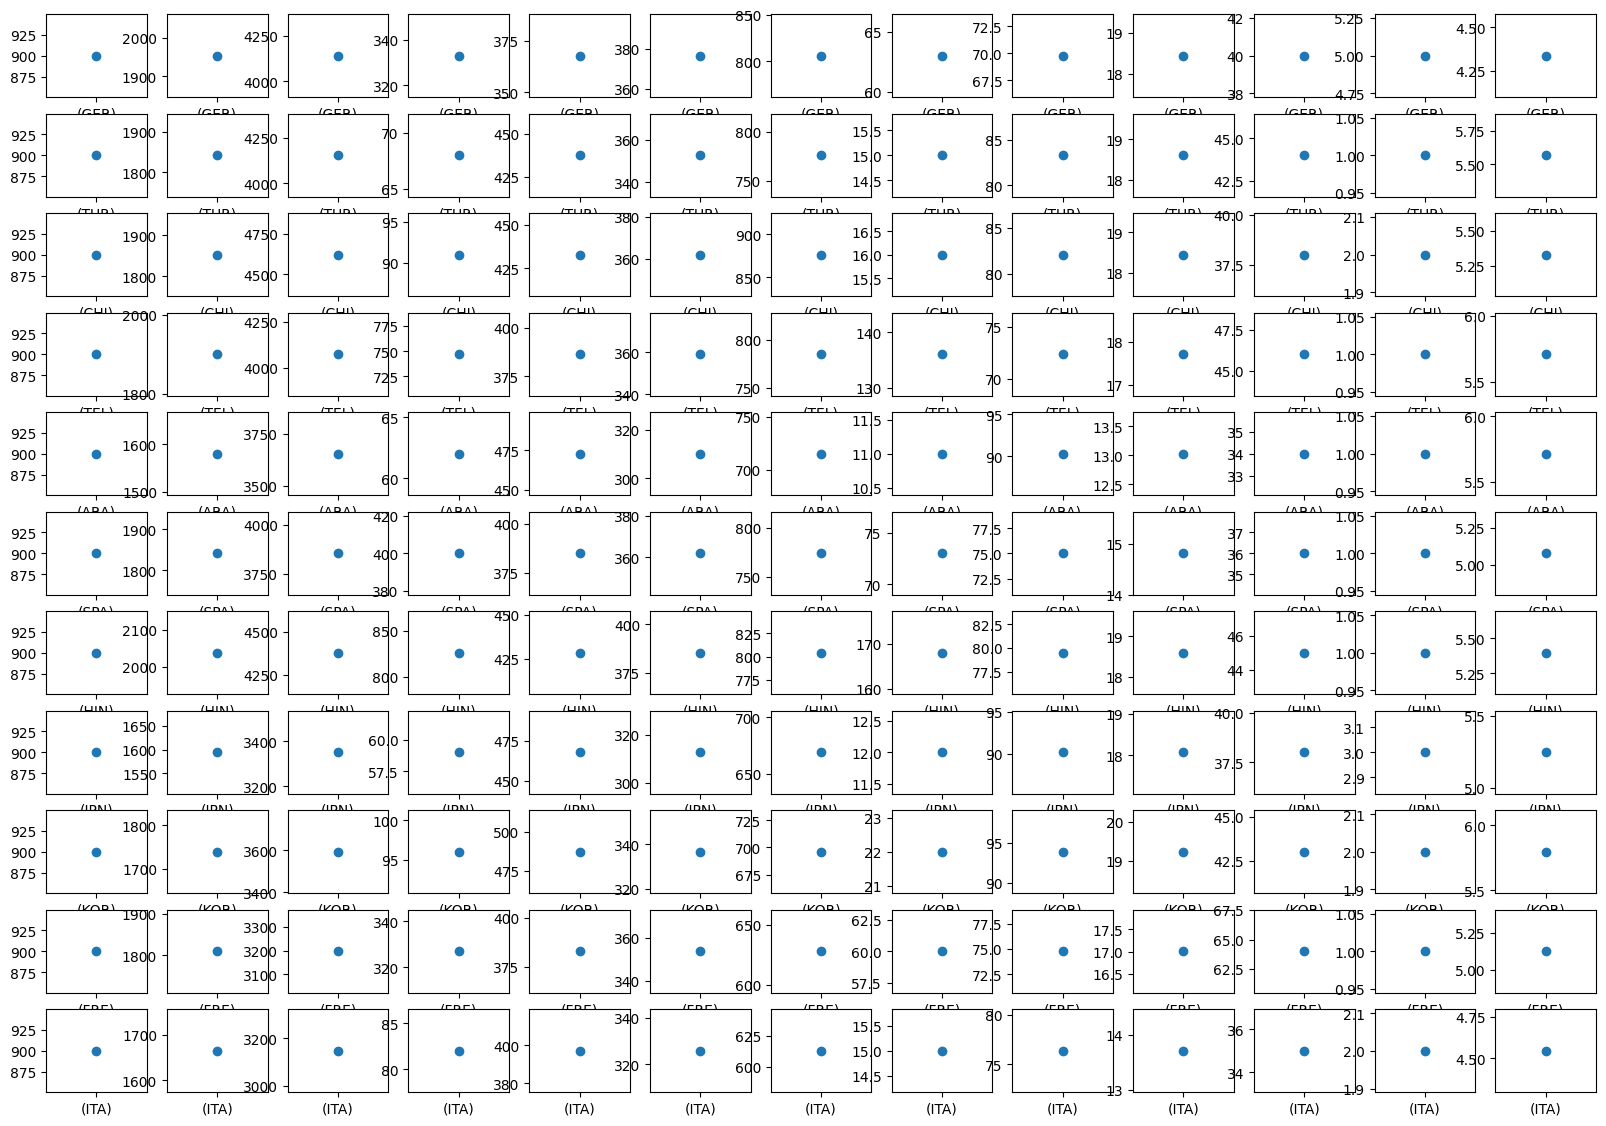

In [56]:
plt.figure(figsize=(20, 14))


for lang in res:
    for metric in res[lang]:
        plt.subplot(len(res), len(res[lang]), len(res[lang]) * list(res.keys()).index(lang) + list(res[lang]).index(metric) + 1)
        plt.scatter(lang, res[lang][metric], label=metric)


plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
y = df["Lang"]
X = df["Text"].values

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


['IThe importance and popularity of travelling is still raising , Everybody is interested in getting to know other countries and continents but the ways how to do it , are very differently . I agree with the statement that it is the best way to travel in a group led by a tour guide . If you travel in a group and you have a tour guide you get to know the most famous places and you get to know interesting things about the country you decided to visit . The tour guide would organise everything for you , so the only thing you would have to do is to go to the appointments with the group . Another aspect is that you would get to know a lot of interesting people . When you travel in a group it is very easy to get to know other people because usually you sit in the same bus or you sleep in the same hotel like the others do . That is why you are never borring when you travel in groups . If you decide to travel in a group and you visit a country which is dangerouses then the tour guide can infor

ValueError: Found input variables with inconsistent numbers of samples: [9900, 7920]

In [51]:
res

{'(GER)': {'nb': 900,
  'moy length': 1953.1833333333334,
  'max length': 4141,
  'min length': 333,
  'esperance length': 367.82484942618396,
  'moy nb mot': 376.53333333333336,
  'max nb mot': 806,
  'min nb mot': 63,
  'esperance nb mot': 69.7724730662122,
  'moy nb phrase': 18.434444444444445,
  'max nb phrase': 40,
  'min nb phrase': 5,
  'esperance nb phrase': 4.336144520388272},
 '(TUR)': {'nb': 900,
  'moy length': 1842.0666666666666,
  'max length': 4154,
  'min length': 68,
  'esperance length': 437.44641241812246,
  'moy nb mot': 352.6711111111111,
  'max nb mot': 776,
  'min nb mot': 15,
  'esperance nb mot': 83.3032617896381,
  'moy nb phrase': 18.61111111111111,
  'max nb phrase': 44,
  'min nb phrase': 1,
  'esperance nb phrase': 5.567253781769041},
 '(CHI)': {'nb': 900,
  'moy length': 1852.431111111111,
  'max length': 4620,
  'min length': 91,
  'esperance length': 432.74693739299096,
  'moy nb mot': 361.8122222222222,
  'max nb mot': 876,
  'min nb mot': 16,
  'esper